# QF602 Derivatives-Homework3
                                                                               Ankit Rawat

## Question 1 - SABR

### - Describe what is a SABR model.
The SABR model (stochastic alpha-beta-rho) is pioneered by Patrick Hagan (2002) and is characterised by the SDEs
The volatility is stochastic and follows a zero-drift lognormal dynamics. Hagan derived the formula for implied volatility σSABR as an analytical function of the model parameters.
To value vanilla European options, we just need to calculate σSABR and substitute this implied volatility into the Black’s formula to convert to price.
This is much quicker than the Heston model. SABR model is widely used across a range of asset classes.

-  $ dF_t = \alpha_t F_t^\beta  dW_t^F$
-  $ \alpha = \nu \alpha_t dW_t^\alpha$

where $ dW_t^F dW_t^\alpha = \rho dt $
The volatility is stochastic and follows a zero-drift lognormal dynamics. Hagan derived the formula for implied volatility σSABR as an analytical function of the model parameters.
To value vanilla European options, we just need to calculate σSABR and substitute this implied volatility into the Black’s formula to convert to price.
This is much quicker than the Heston model. SABR model is widely used across a range of asset classes.

- Formula 
 -   $  x(z)  =  log( \sqrt(1 -  2 \rho z  + z^2 ) + z - \rho $ 
 -   $ z =  \frac{\nu}{\alpha} ( F_0 K ) ^ \frac{1- \beta}{2} log ( \frac {F_0}{K})$

### - How many parameters in a SABR model? Qualitatively, how do those parameters impact the volatility smile?

SABR has 4 parameters can be used for calibration:

- α = α(0), an initial value of the volatility.
- β, the CEV parameter.
- ρ, the correlation between the forward and the vol processes. 
- $ \nu $ , the vol of vol parameter.


Behavior of Model Parameters – ρ Implication on Distribution
- The correlation parameter ρ is proportional to the skewness of stock returns.
- Intuitively, a negative correlation results in high volatility when the stock price drops, and this spreads the left tail of the probability density. The right tail is associated with low volatility and is not spread out.
- A negative correlation creates a fat left tail and a thin right tail in the stock return distribution.
Implication on Pricing
- This increases the prices of out-of-the-money puts and decreases the prices of out-of-the-money calls relative to the Black-Scholes model price.
- Intuitively, out-of-the-money put options benefit substantially from a fat left tail.
- A positive correlation will have completely opposite effects — it creates a fat right tail and a thin left tail.
- Positive correlation between stock and volatility is associated with positive skew in return distribution.
- Negative correlation between stock and volatility is associated with negative skew in return distribution.
- Negative correlation increases the price of out-of-the-money put options and decreases the price of out-of-the-money call options.

Behavior of Model Parameters – ν Implication on Distribution
- When the volatility of volatility parameter is 0, we are back to a normal log-return distribution (if β = 0).
- Otherwise, it increases the kurtosis of stock returns, creating two fat tails in both ends of the distribution.
- This has the effect of raising out-of-the-money puts and out-of-the-money call prices.
Implication on Pricing
- If volatility is uncorrelated with stock return, then increasing the volatility of volatility only increases the kurtosis of spot return.
- In this case, random volatility is associated with increases in the prices of far-from-the-money options relative to near-the-money options.
- In contrast, the correlation of volatility with the spot return produces skewness.

###  - Please draw the impact to the volatility smile for each model parameter

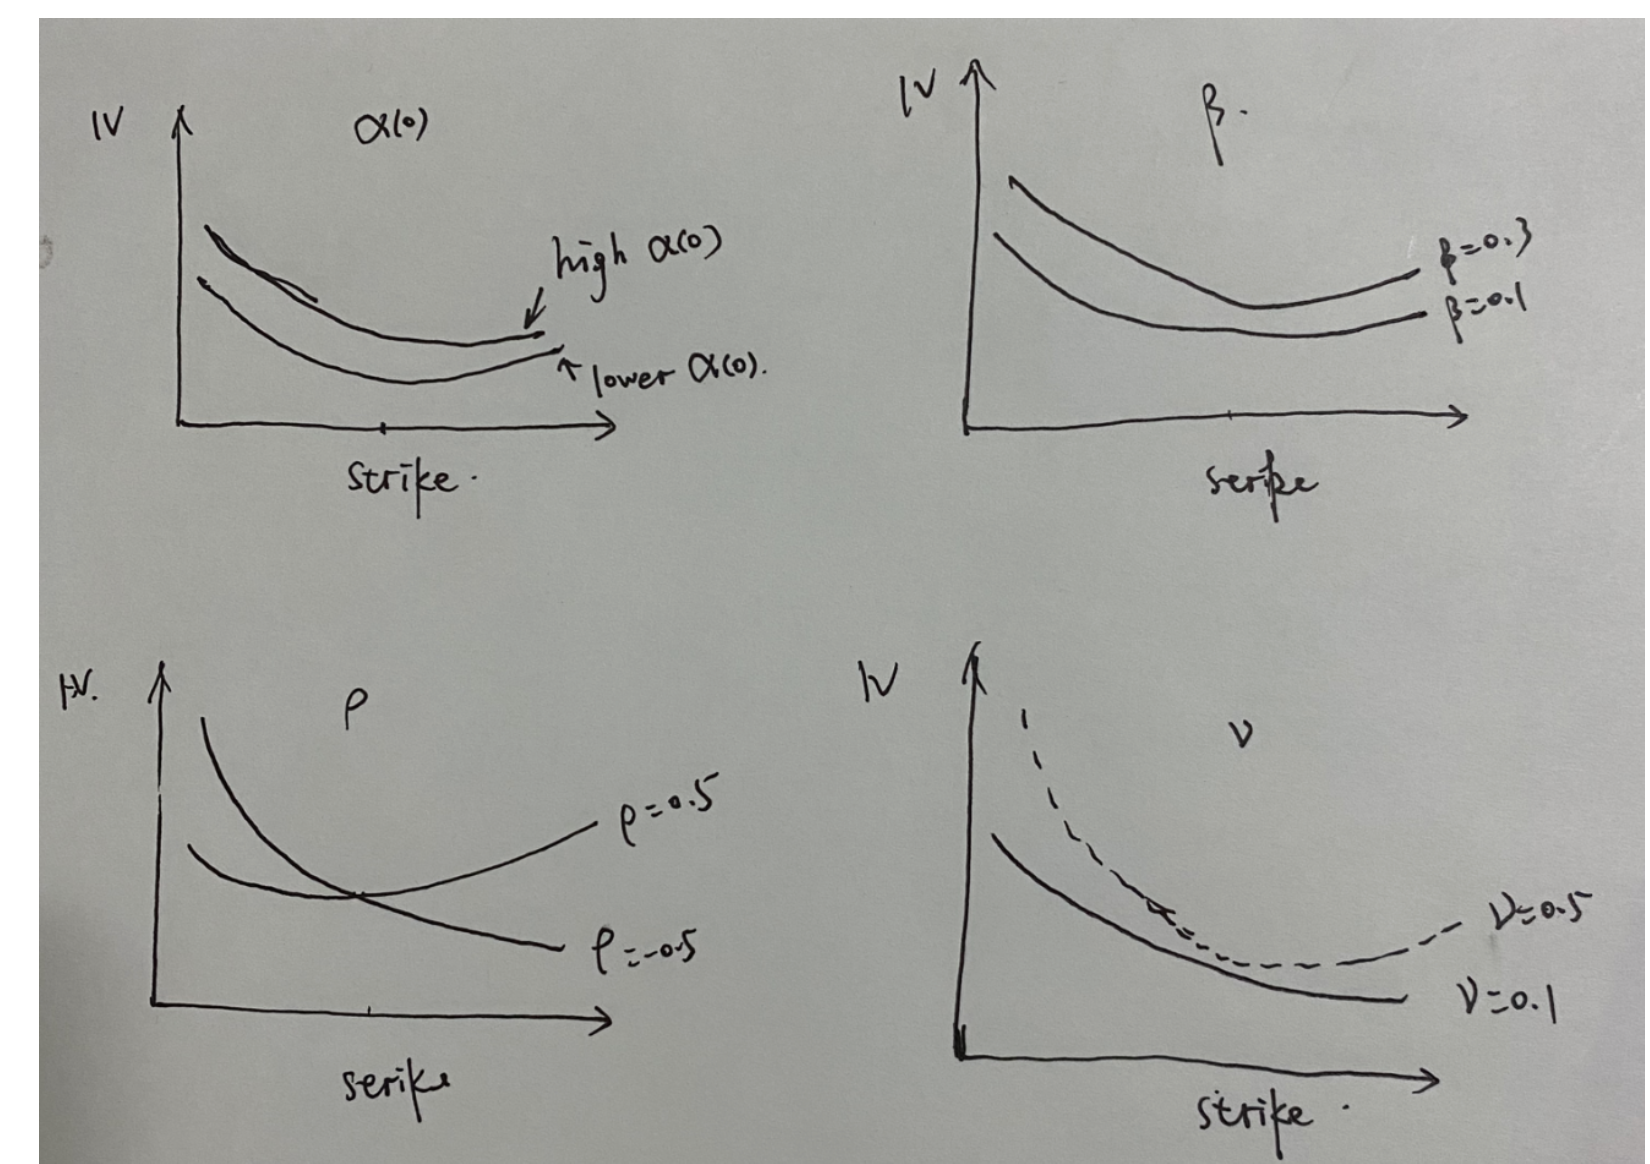

## Question 2 - Barrier Option

### - Explain what is in-out parity for barrier option
1. In -Out parity is mix of IN-OUT option
2. Generally user holds two barrier option ( example : Call [UO] +Call [UI])
3. if the stock price reaches the barrier, then the first 
call is worthless and the second call will be activated. If the stock price never 
touches the barrier, the first call will remain active, while the second one is never activated. 
4. Either way, one of them is active

### - Can you explain why the delta of an up and in call option can be greater than 1?
- Consider example  : Spot = 129, Strike = 100, Barrier = 130.
- So, around 129 Spot price high change is with change of spot price with 1 dollar their will be jump in profit to 30 dollarfrom 0  Dollar. Hence Delta is greater than 1 around that 

### - Please draw the delta profile of an up and in call option with Spot = 100, Strike = 100, Barrier = 130.
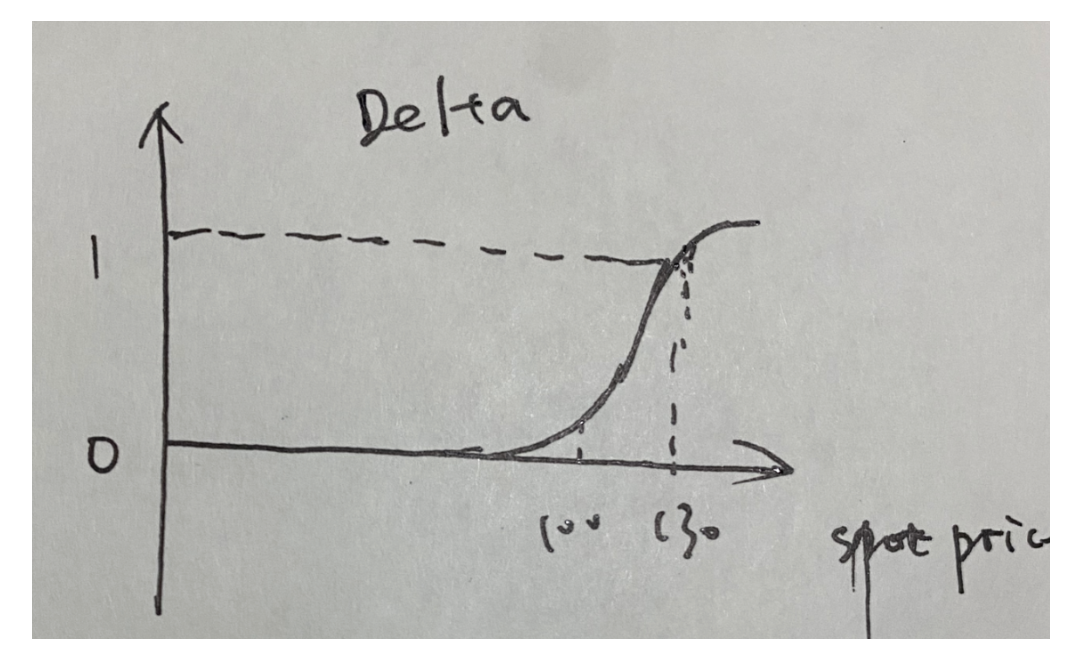

## Questions 3. If both Black and Bachelier models are calibrated to the same implied volatility at strike K with maturity T

### - Which calibrated model will give the higher price for an European option with the same maturity with the strike K1 which is less than K?


In [166]:
def BachelierCall(S, K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return (S-K)*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c)

def BachelierPut(S, K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return (K-S)*norm.cdf(-c) + sigma*S*np.sqrt(T)*norm.pdf(-c)   

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
S  = 100;  K  = 300; k1 = 200;Sigma = 0.20;T = 1;r = 0.01
print (" Bachelier Put Option price at Strike price 300 : {}".format(BachelierCall (S, K, sigma, T  )))
print (" BlackScholes Put Option price at Strike price 300 : {}".format(BlackScholesCall(S,K,r,sigma,T)))
print (" BachelierCall Option price at Strike price 200 : {}".format(BachelierCall (S, k1, sigma, T  )))
print (" BlackScholes Put Option price at Strike price 200 : {}".format(BlackScholesCall(S,k1,r,sigma,T)))
print (" Bachelier Put Option price at Strike price 300 : {}".format(BachelierPut (S, K, sigma, T )))
print (" BlackScholes put Option price at Strike price 300 : {}".format(BlackScholesPut(S,K,r,sigma,T)))
print (" Bachelier Put  Option price at Strike price 200 : {}".format(BachelierPut (S, k1, sigma, T  )))
print (" BlackScholes put Option price at Strike price 200 : {}".format(BlackScholesPut(S,k1,r,sigma,T)))

print ( "\n Bachelier model has higher price compare to BlackScholes " )

 Bachelier Put Option price at Strike price 300 : 1.494912050918996e-23
 BlackScholes Put Option price at Strike price 300 : 1.5542292249802166e-07
 BachelierCall Option price at Strike price 200 : 1.0692331067666261e-06
 BlackScholes Put Option price at Strike price 200 : 0.002283734887204951
 Bachelier Put Option price at Strike price 300 : 200.0
 BlackScholes put Option price at Strike price 300 : 197.01495028017337
 Bachelier Put  Option price at Strike price 200 : 100.00000106923311
 BlackScholes put Option price at Strike price 200 : 98.01225048472081

 Bachelier model has higher price compare to BlackScholes 


### - Please draw the implied volatility smiles from both calibrated models.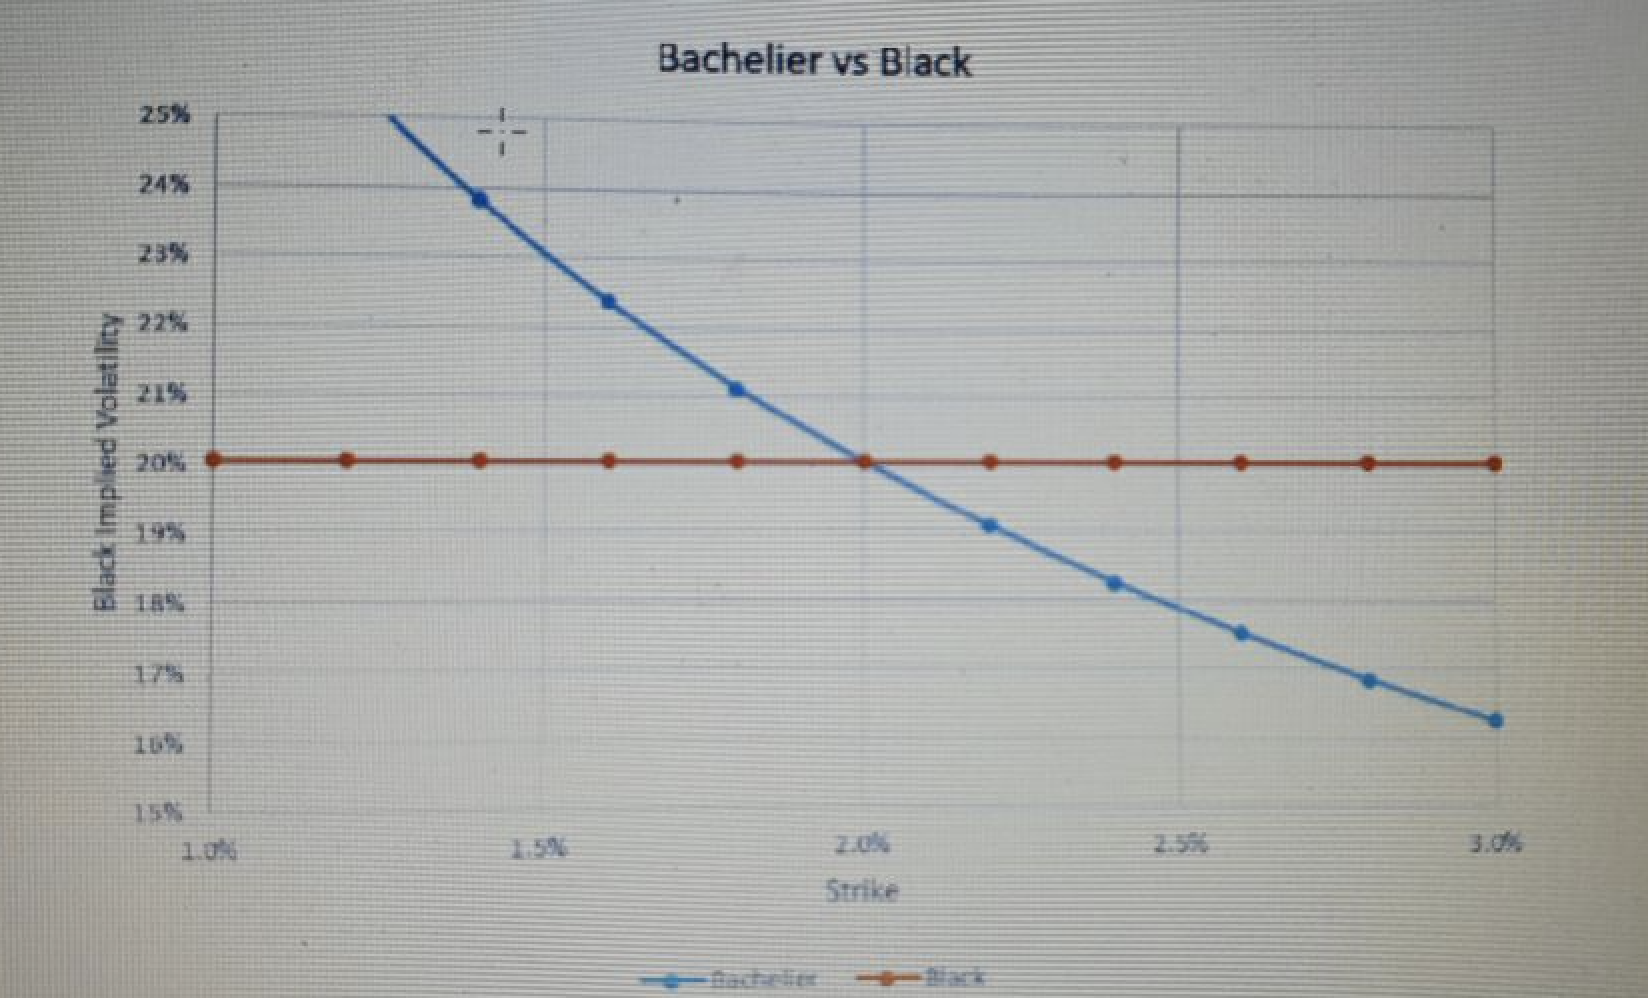

## Question 4- Change of Measure

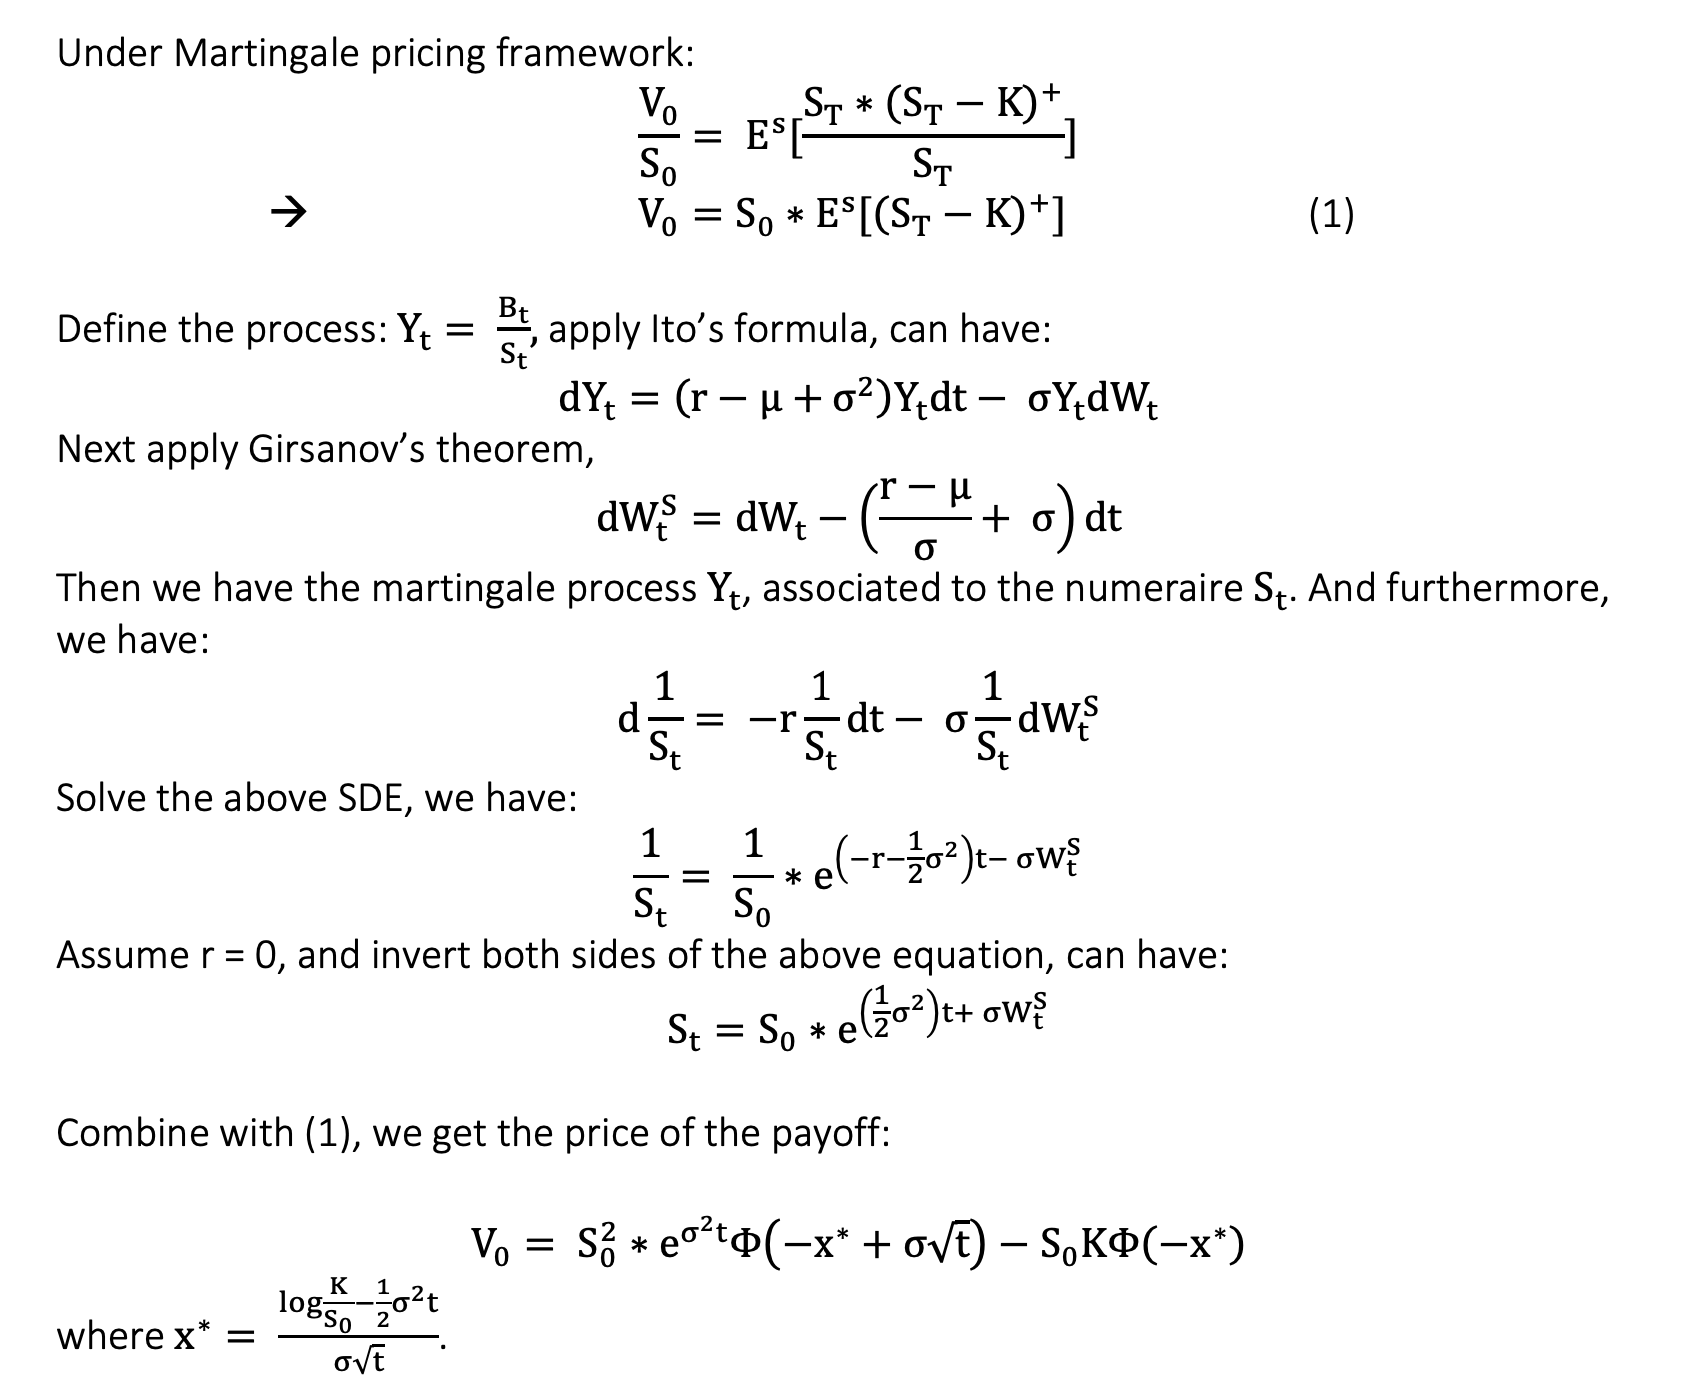

## Question 5 – Change of Measure
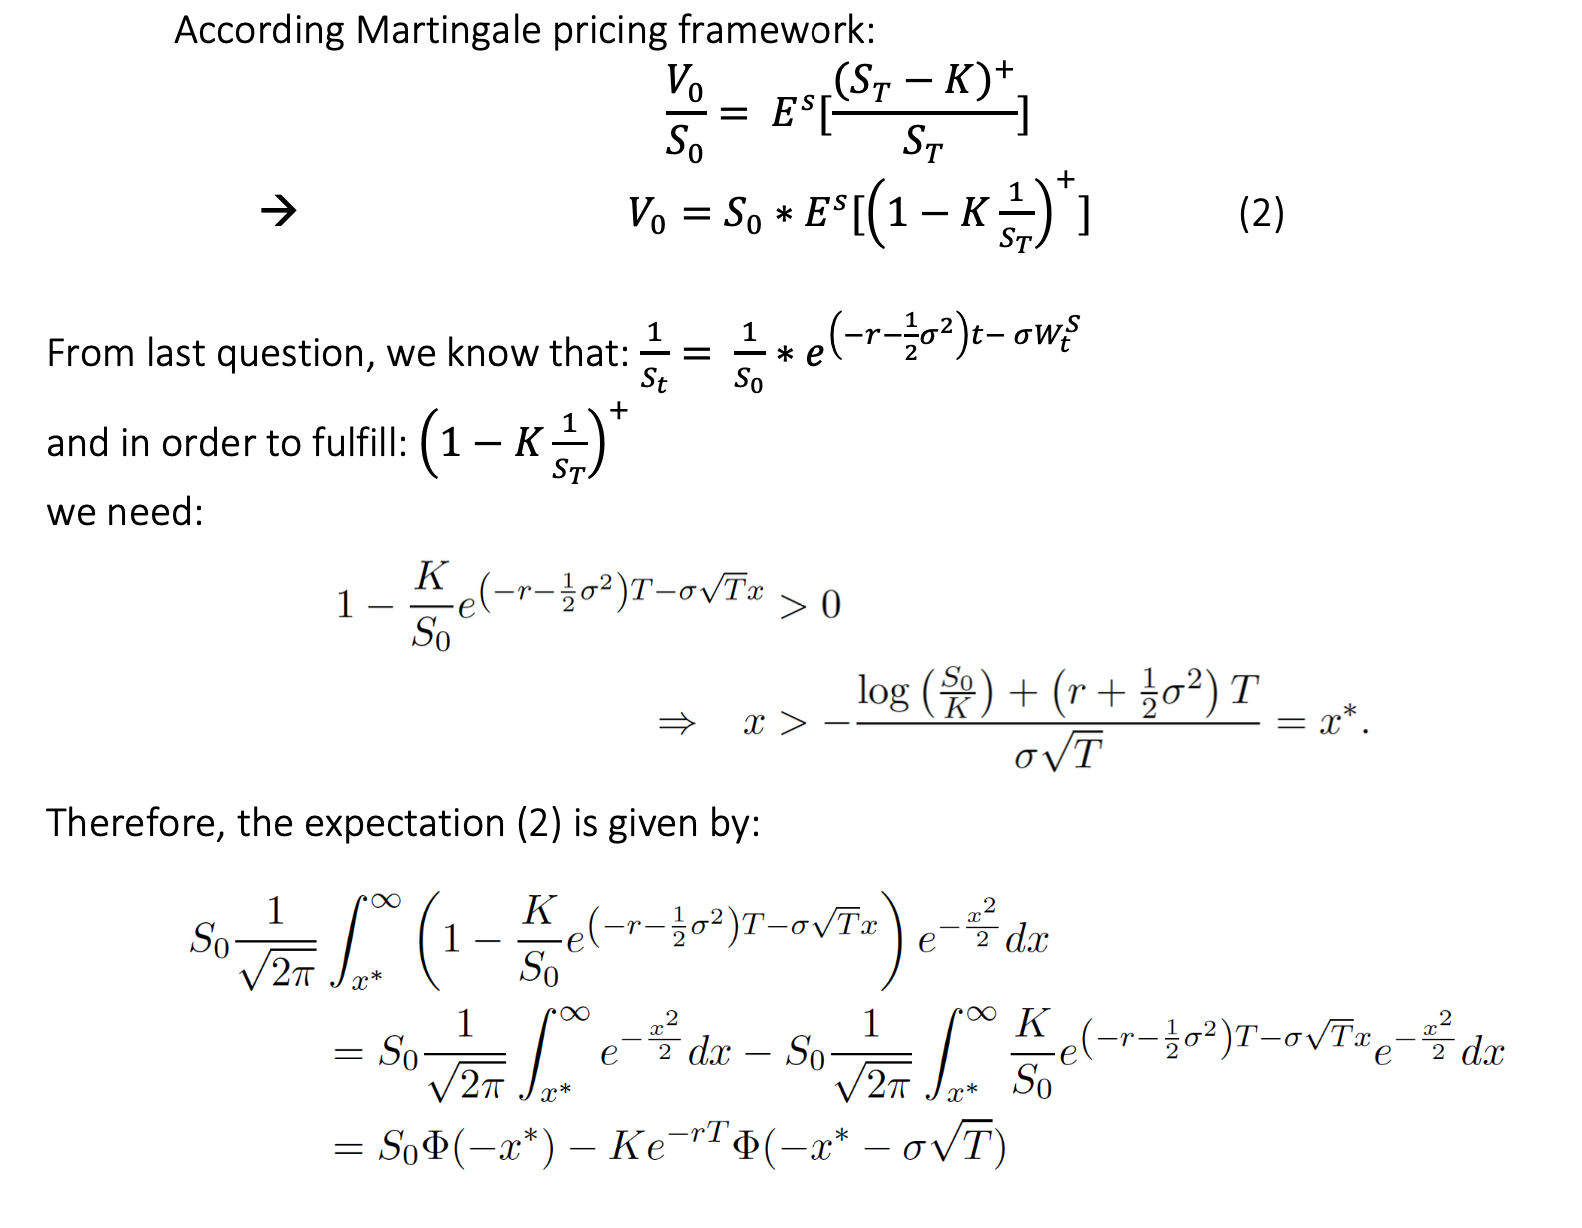

## Question 6 – Foreign Currency Stock

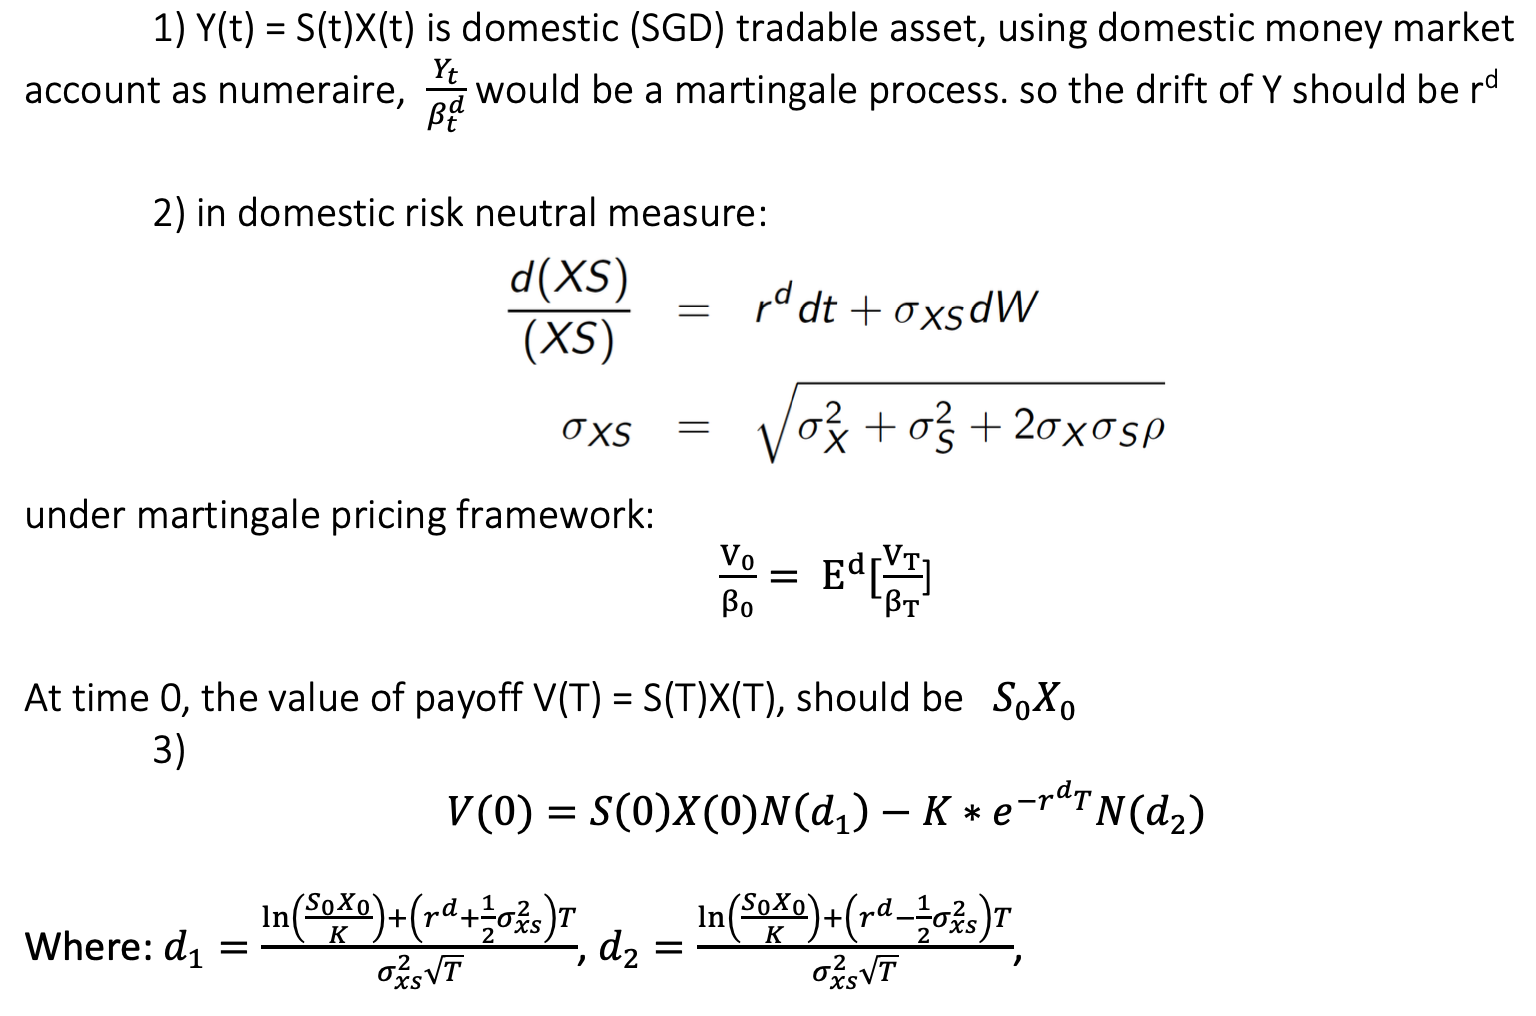